In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (1) Temperature Data

In [10]:
treated_data_rep = r'../0_Data/wrangled/' 
Temperature_AGG = pd.read_pickle(treated_data_rep+"Temperature_AGG.pkl")
Temperature_AGG.head(n=5)

,Date,Dist,year,value,Flag
0,2009-11-01,KTG,2009,30.5,C
1,2009-11-02,KTG,2009,26.3,C
2,2009-11-03,KTG,2009,20.2,C
3,2009-11-04,KTG,2009,25.8,C
4,2009-11-05,KTG,2009,28.9,#


In [11]:
len(set(Temperature_AGG.year.values))

135

In [12]:
print(max([int(x) for x in Temperature_AGG.year.values if pd.isna(x)==False]))

2025


There are 135 years of records. Here, we focus on the temperature records for last 10 years from 2024 (the last year with complete observation of the year).

In [13]:
print(f"Data size before filter on the period: {Temperature_AGG.shape[0]}")
Temperature_AGG = Temperature_AGG.loc[Temperature_AGG['Date'].dt.year>=2015]
print(f"Data size after filtering: {Temperature_AGG.shape[0]}")

Data size before filter on the period: 358380
Data size after filtering: 137588


In [14]:
# Day of the year
Temperature_AGG['day_of_year'] = Temperature_AGG['Date'].dt.dayofyear

In [15]:
# Add mean values :
mean_temp = Temperature_AGG[['Date', 'value']].groupby('Date').mean().reset_index()
mean_temp['year'] = mean_temp['Date'].dt.year
mean_temp['day_of_year'] = mean_temp['Date'].dt.dayofyear


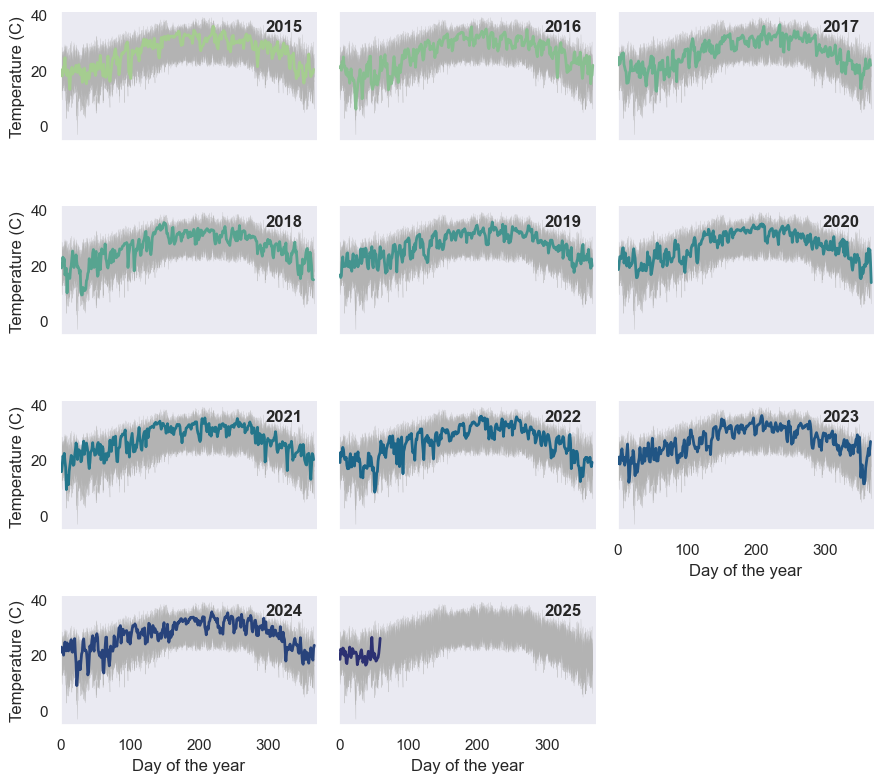

In [16]:
sns.set_theme(style="dark")

# Plot the yearly mean temperature over all the observatories:
g = sns.relplot(
    data=mean_temp,
    x="day_of_year", y="value", col="year", hue="year",
    kind="line", palette="crest", linewidth=2, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
# Iterate over each subplot (by each observatory):
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    # Plot every observatory's time series of the year in grey in the background
    sns.lineplot(
        data=Temperature_AGG, x="day_of_year", y="value", units="year",
        estimator=None, color=".7", linewidth=0.2, ax=ax,
    )
# X-axis boundary
g.set(xlim = (0, 370))
g.set_titles("")
g.set_axis_labels("Day of the year", "Temperature (C)")
g.tight_layout()

[Text(0.5, 0, 'Month of the year'), Text(0, 0.5, 'Temperature (C)')]

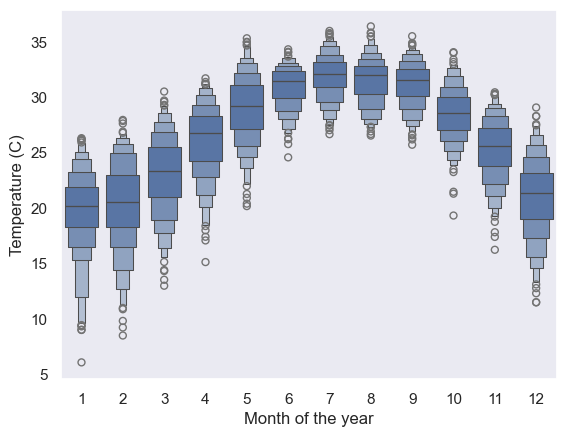

In [17]:
mean_temp['month'] = mean_temp['Date'].dt.month
sns.set_theme(style="dark")
g = sns.boxenplot(
    mean_temp, x="month", y="value",
    color="b", width_method="linear",
)
g.set(xlabel = "Month of the year", ylabel ="Temperature (C)")


In [18]:
mean_temp['value'] = pd.to_numeric(mean_temp['value'], errors='coerce')
mean_temp[['value']].describe()

,value
count,3712.000000
mean,26.525826
std,5.200159
min,6.055556
25%,22.533840
50%,27.347297
75%,30.977928
max,36.391892


In [19]:
print(f"Temperature Variance : {round(np.var(mean_temp[['value']].value),2)}")
print(f"Its Standard deviation : {round(np.std(mean_temp[['value']].value),2)}")

Temperature Variance : 27.03
Its Standard deviation : 5.2


The average (over different observatories in HK) of daily maximal temperature in Hong Kong, with 10 years of observation, **varies between 6 and 36 degrees.** The hottest season of the year includes four months from June to September. Winter time in Hong Kong corresponds to three months period from December to February. **Even in the winter time, the average value for daily maximal temperature is around 20 degrees.**

Idea 1: Temperature varies much less in Hong Kong than in Paris and in Seoul.

# (2) Humidity Data

In [20]:
treated_data_rep = r'../0_Data/wrangled/' 
Humidity_AGG = pd.read_pickle(treated_data_rep+"Humidity_AGG.pkl")

In [21]:
len(set(Humidity_AGG.year.values))

79

There are also the records for too many years (79 years). Here, we focus on the temperature records for last 10 years from 2024 (the last year with complete observation of the year).

In [22]:
print(f"Data size before filter on the period: {Humidity_AGG.shape[0]}")
Humidity_AGG = Humidity_AGG.loc[Humidity_AGG['Date'].dt.year>=2015]
print(f"Data size after filtering: {Humidity_AGG.shape[0]}")

Data size before filter on the period: 241237
Data size after filtering: 85750


In [23]:
# Add mean values :
mean_hum = Humidity_AGG[['Date', 'value']].groupby('Date').mean().reset_index()
mean_hum['year'] = mean_hum['Date'].dt.year
mean_hum['day_of_year'] = mean_hum['Date'].dt.dayofyear
Humidity_AGG.loc[:,'day_of_year'] = Humidity_AGG['Date'].dt.dayofyear

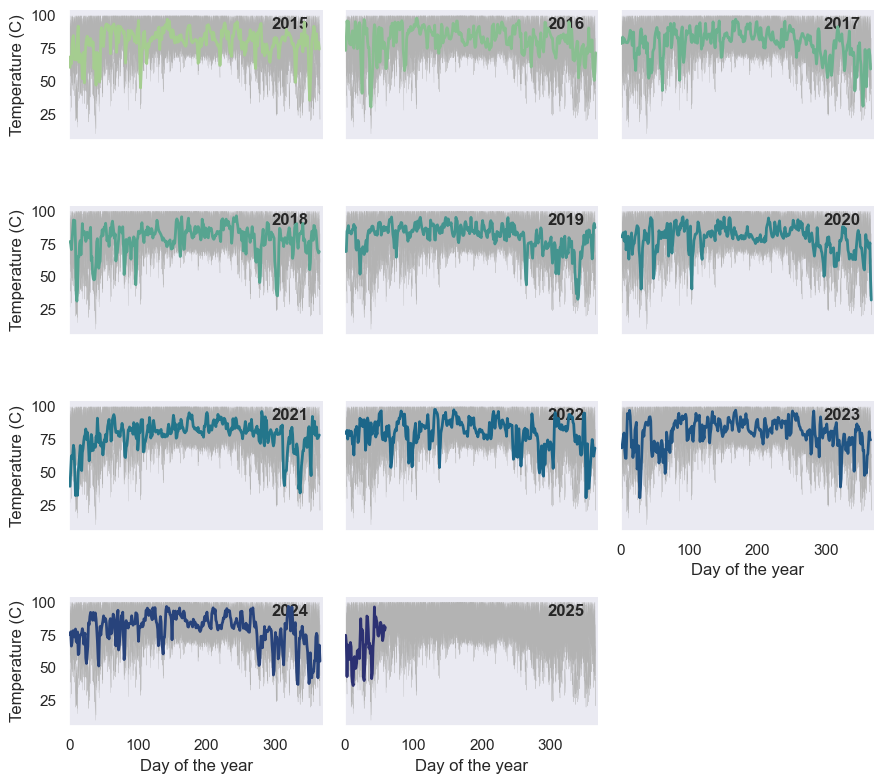

In [24]:
sns.set_theme(style="dark")

# Plot the yearly mean temperature over all the observatories:
g = sns.relplot(
    data=mean_hum,
    x="day_of_year", y="value", col="year", hue = "year",
    kind="line", palette="crest", linewidth=2, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
# Iterate over each subplot (by each observatory):
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    # Plot every observatory's time series of the year in grey in the background
    sns.lineplot(
        data=Humidity_AGG, x="day_of_year", y="value", units="year",
        estimator=None, color=".7", linewidth=0.2, ax=ax,
    )
# X-axis boundary
g.set(xlim = (0, 370))
g.set_titles("")
g.set_axis_labels("Day of the year", "Temperature (C)")
g.tight_layout()

[Text(0.5, 0, 'Month of the year'), Text(0, 0.5, 'Humidity')]

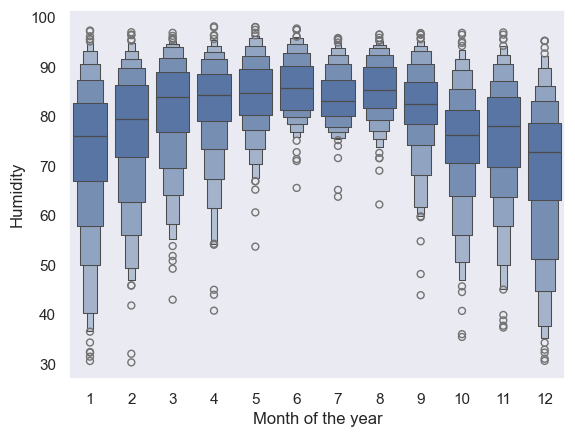

In [25]:
mean_hum['month'] = mean_hum['Date'].dt.month
sns.set_theme(style="dark")
g = sns.boxenplot(
    mean_hum, x="month", y="value",
    color="b", width_method="linear",
)
g.set(xlabel = "Month of the year", ylabel ="Humidity")


Air humidity is almost always high all year around. Given that the humidity between 40 and 50 is the pleasant air condition for human being, the high average humidity around 80 in the summer time and around 70 in the winter time obliges Hongkongers to equip their apartment with at least one or two dehumidifiers. It is an interesting fact that the humidity is more variable in the winter time than in the summer time. 

How the temperature behaves with regard to the humidity? 

In [26]:
mean_temp['month'] = mean_temp['Date'].dt.month 

In [27]:
comp_temp_hum = mean_temp[['Date', 'month','value']].set_index('Date').join(mean_hum[['Date', 'value']].set_index('Date'), lsuffix="_temp", rsuffix="_hum")
comp_temp_hum.loc[comp_temp_hum['month'].isin([6,7,8,9]),'season']="Summer"
comp_temp_hum.loc[comp_temp_hum['month'].isin([12,1,2]),'season']="Winter"
comp_temp_hum.loc[comp_temp_hum['month'].isin([3,4,5,10,11]),'season']="Inter-seasonal"

We see that the humidity distribution doesn't change much between different seasonal periods, in contrary to the temperature distribution for which three different seasonal periods catch quite well the distiction in terms of values. 

This joint density graph confirms our observation on the variation of these two variables. 

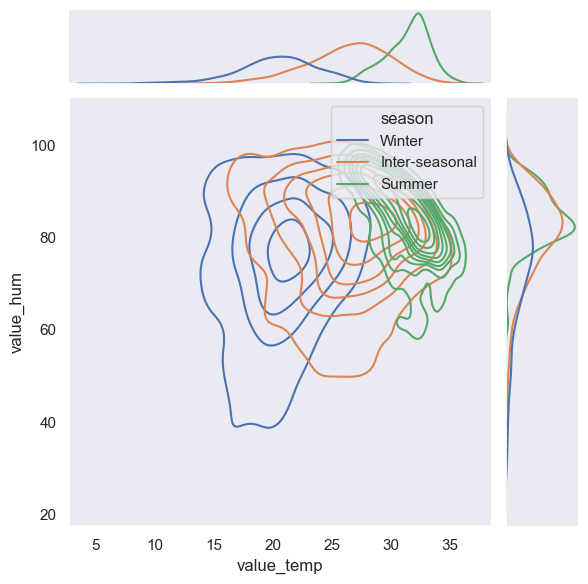

In [28]:
g = sns.jointplot(
    data=comp_temp_hum,
    x="value_temp", y="value_hum", hue="season",
    kind="kde",
)

In [29]:
mean_hum['value'] = pd.to_numeric(mean_hum['value'], errors='coerce')
mean_hum[['value']].describe()

,value
count,3712.000000
mean,79.745216
std,10.961841
min,30.347826
25%,75.304348
50%,81.739130
75%,87.086957
max,98.173913


In [30]:
print(f"Humidity Variance : {round(np.var(mean_hum[['value']].value),2)}")
print(f"Its Standard deviation : {round(np.std(mean_hum[['value']].value),2)}")

Humidity Variance : 120.13
Its Standard deviation : 10.96
